# Telco Customer Churn
### Focused customer retention programs
#### Context
This IBM Sample Dataset has information about Telco customers and if they left the company within the last month (churn). Each row represents a unique costumer, while the columns contains information about customer’s services, account and demographic data. 

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." 

Churn is a one of the biggest problem in the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.

#### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

##### Basic information:

- Only 7043 rows
- There are 21 columns with 19 features
- Only 11 missing values (next item).

#### The data set includes information about:
Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore')
from scipy import stats # statistic library
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [2]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),2) 

    return summary

### Load data

In [3]:
customer_churn =  pd.read_csv("https://raw.githubusercontent.com/katonic-dev/Examples/master/customer_churn/customer_churn.csv?token=ATCRWXSWA6THZVYU7RA2VM3AYYYYK")

In [4]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Profiling

In [5]:
# Shape of the dataset
customer_churn.shape

(7043, 21)

In [6]:
#Information about the columns
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#Checking if there is any null values in the dataset
customer_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#Basic summary statistics
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
customer_churn.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [10]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
customer_churn['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [12]:
resumetable(customer_churn)

Dataset Shape: (7043, 21)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,customerID,object,0,7043,7590-VHVEG,5575-GNVDE,3668-QPYBK,3.85
1,gender,object,0,2,Female,Male,Male,0.30
2,SeniorCitizen,int64,0,2,0,0,0,0.19
3,Partner,object,0,2,Yes,No,No,0.30
4,Dependents,object,0,2,No,No,No,0.27
5,tenure,int64,0,73,1,34,2,1.78
6,PhoneService,object,0,2,No,Yes,Yes,0.14
7,MultipleLines,object,0,3,No phone service,No,No,0.41
8,InternetService,object,0,3,DSL,DSL,DSL,0.46
9,OnlineSecurity,object,0,3,No,Yes,Yes,0.45


#### Very interesting.

- We can see that we have one entry for each CustomerId
- The dataset don't have missing values
- Some features are categorical
- The target the we will use to guide the exploration is Churn

In [13]:
print("CUSTOMERS %CHURN:")
print(round(customer_churn['Churn'].value_counts(normalize=True) * 100,2))

CUSTOMERS %CHURN:
No     73.46
Yes    26.54
Name: Churn, dtype: float64


### Data Exploration
Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

#### A.) Demographics - Let us first understand the gender, age range, patner and dependent status of the customers

1. ##### Gender Distribution - About half of the customers in our data set are male while the other half are female

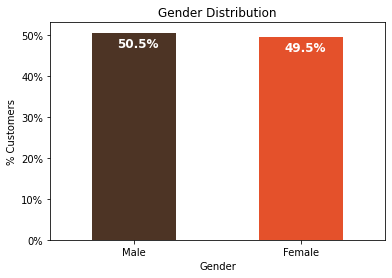

In [14]:
colors = ['#4D3425','#E4512B']
ax = (customer_churn['gender'].value_counts()*100.0 /len(customer_churn)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

 2. ##### % Senior Citizens - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

Text(0.5, 1.0, '% of Senior Citizens')

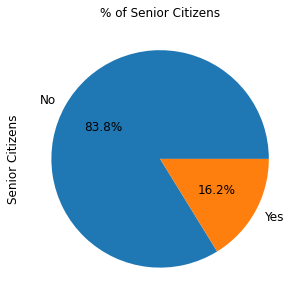

In [15]:
ax = (customer_churn['SeniorCitizen'].value_counts()*100.0 /len(customer_churn))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

3. ##### Partner and dependent status - About 50% of the customers have a partner, while only 30% of the total customers have dependents.

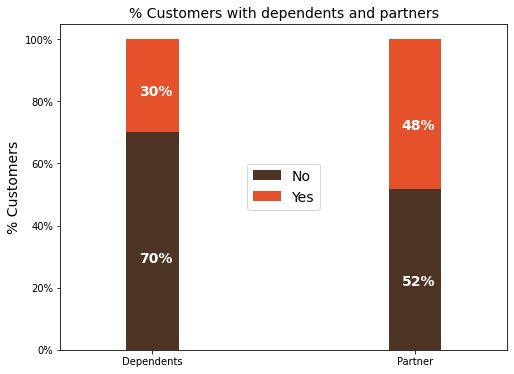

In [16]:
df2 = pd.melt(customer_churn, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(customer_churn)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Interestingly, among the customers who have a partner, only about half of them also have a dependent, while other half do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (80%) of them do not have any dependents .

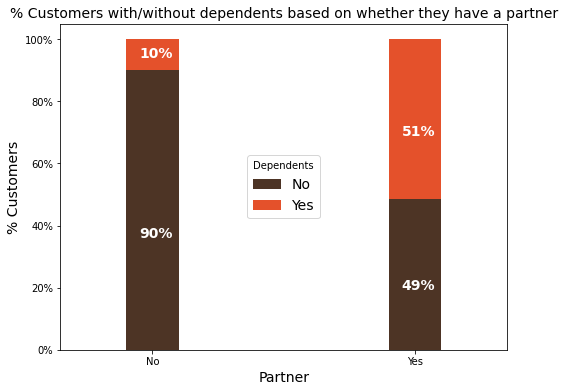

In [17]:
colors = ['#4D3425','#E4512B']
partner_dependents = customer_churn.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

I also looked at any differences between the % of customers with/without dependents and partners by gender. There is no difference in their distribution by gender. Additionally, there is no difference in senior citizen status by gender.

#### B.) Customer Account Information: Let u now look at the tenure, contract
1. ##### Tenure: After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

Text(0.5, 1.0, '# of Customers by their tenure')

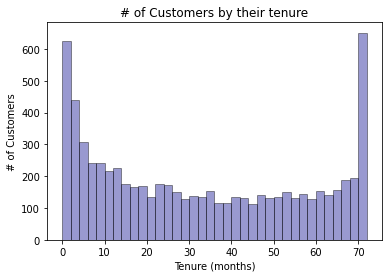

In [18]:
ax = sns.distplot(customer_churn['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

2. ##### Contracts: To understand the above graph, lets first look at the # of customers by different contracts.

Text(0.5, 1.0, '# of Customers by Contract Type')

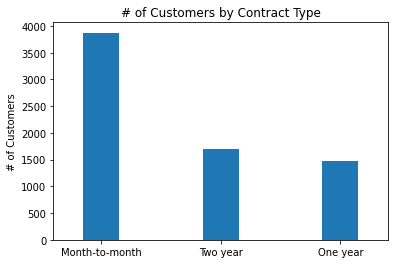

In [19]:
ax = customer_churn['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

Below we will understand the tenure of customers based on their contract type.

Text(0.5, 1.0, 'Two Year Contract')

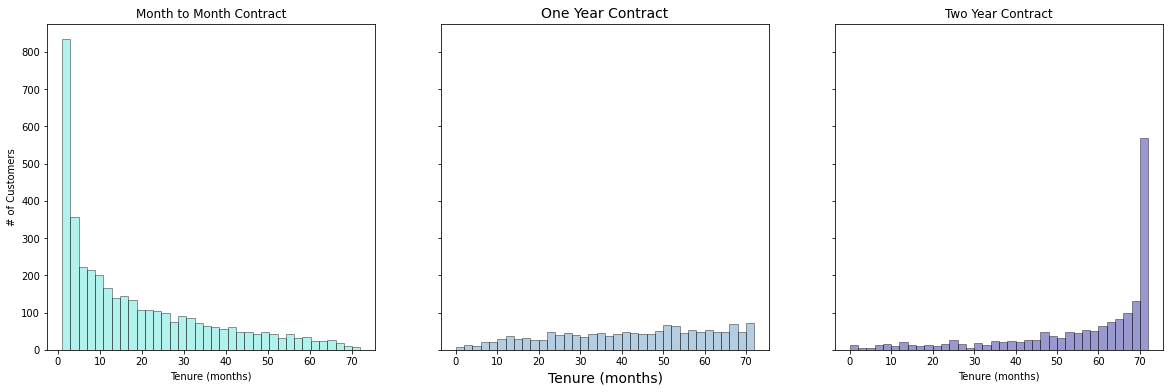

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(customer_churn[customer_churn['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(customer_churn[customer_churn['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(customer_churn[customer_churn['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

In [21]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Label Encoder
##### In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels info the labels into numeric form so as to convert it into the machine-readable form.

In [22]:
encode = LabelEncoder()

In [23]:
objectcolumns = customer_churn.select_dtypes(include=["object"])
print(objectcolumns.columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [24]:
for a in objectcolumns:
    customer_churn[a] = encode.fit_transform(customer_churn[a])

In [25]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [26]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


### Train & Test

In [27]:
X_train = customer_churn.drop(['Churn', 'customerID'], axis=1)
y_train = customer_churn['Churn']

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.20,random_state=42)

In [29]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

### Classifier Models
##### Graph labels

In [30]:
x_label = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']
y_label = 'Churn'

#### Decision Tree Classifier

In [31]:
decision_tree = DecisionTreeClassifier()
decisiontree = decision_tree.fit(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

99.86

In [32]:
predictions = decision_tree.predict(X_val.values)

print ("\naccuracy_score :",accuracy_score(y_val, predictions))

print ("\nclassification report :\n",(classification_report(y_val, predictions)))


accuracy_score : 0.7224982256919801

classification report :
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1036
           1       0.47      0.46      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



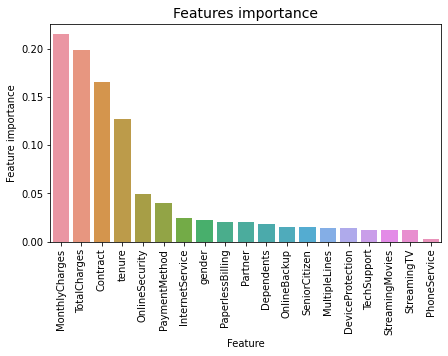

In [33]:
tmp = pd.DataFrame({'Feature': x_label, 'Feature importance': decision_tree.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

#### Random Forest Classifier

In [34]:
random_forest = RandomForestClassifier(n_estimators=100)
randomforest = random_forest.fit(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

99.86

In [35]:
predictions = random_forest.predict(X_val.values)

print ("\naccuracy_score :",accuracy_score(y_val, predictions))

print ("\nclassification report :\n",(classification_report(y_val, predictions)))


accuracy_score : 0.7927608232789212

classification report :
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



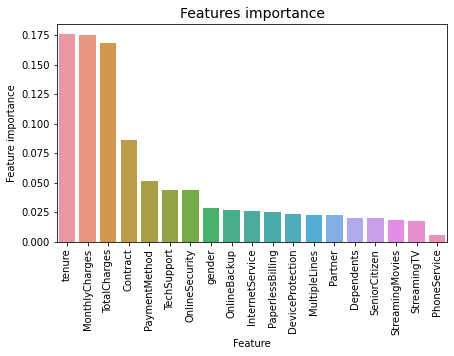

In [36]:
tmp = pd.DataFrame({'Feature': x_label, 'Feature importance': random_forest.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

#### Gradient Boosting Classifier

In [37]:
gradientboostingclassifier = GradientBoostingClassifier()
gradboostclass = gradientboostingclassifier.fit(X_train, y_train)
acc_gbc = round(gradientboostingclassifier.score(X_train, y_train) * 100, 2)
acc_gbc

82.41

In [38]:
predictions = gradientboostingclassifier.predict(X_val.values)

print ("\naccuracy_score :",accuracy_score(y_val, predictions))

print ("\nclassification report :\n",(classification_report(y_val, predictions)))


accuracy_score : 0.8112136266855926

classification report :
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



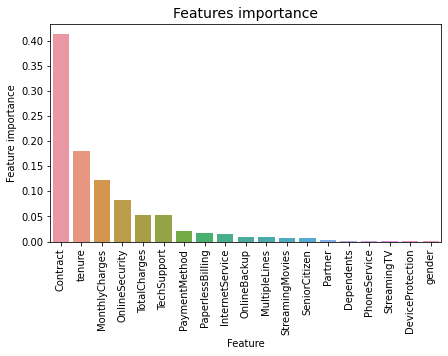

In [39]:
tmp = pd.DataFrame({'Feature': x_label, 'Feature importance': gradientboostingclassifier.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

#### Extra Tree Classifier

In [40]:
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClass = ExtraTreesClassifier.fit(X_train, y_train)
acc_ExtraTreesClass = round(ExtraTreesClassifier.score(X_train, y_train) * 100, 2)
acc_ExtraTreesClass

99.86

In [41]:
predictions = ExtraTreesClassifier.predict(X_val.values)

print ("\naccuracy_score :",accuracy_score(y_val, predictions))

print ("\nclassification report :\n",(classification_report(y_val, predictions)))


accuracy_score : 0.7892122072391767

classification report :
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



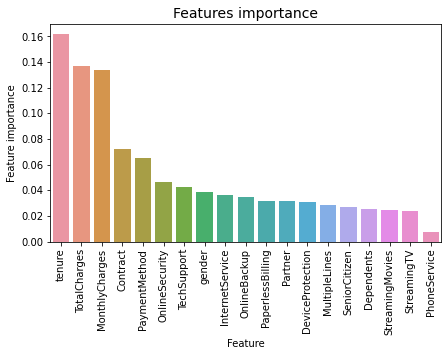

In [42]:
tmp = pd.DataFrame({'Feature': x_label, 'Feature importance': ExtraTreesClassifier.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

#### Cat Boost Classifier

In [43]:
catboostclassifier = CatBoostClassifier(verbose=False)
catboostclass = catboostclassifier.fit(X_train, y_train)
acc_catbc = round(catboostclassifier.score(X_train, y_train) * 100, 2)
acc_catbc

87.89

In [44]:
predictions = catboostclassifier.predict(X_val.values)

print ("\naccuracy_score :",accuracy_score(y_val, predictions))

print ("\nclassification report :\n",(classification_report(y_val, predictions)))


accuracy_score : 0.8026969481902059

classification report :
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.66      0.51      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



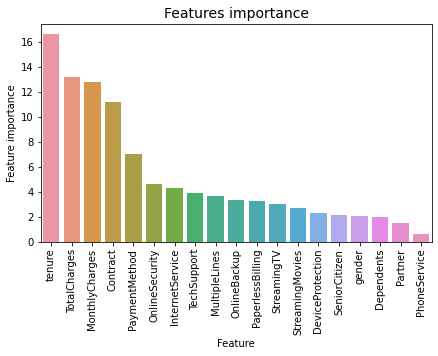

In [45]:
tmp = pd.DataFrame({'Feature': x_label, 'Feature importance': catboostclassifier.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

### Model Evaluation

In [46]:
results = pd.DataFrame({
    'Model': ['Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classifier','Extra Trees Classifier', 'Cat Boost Classifie'],
    'Score': [acc_decision_tree,acc_random_forest,acc_gbc, acc_ExtraTreesClass, acc_catbc],
    'Model_abb': [decisiontree,randomforest,gradboostclass,ExtraTreesClass, catboostclass]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model,Model_abb
Score,,
99.86,Decision Tree Classifier,DecisionTreeClassifier()
99.86,Random Forest Classifier,"(DecisionTreeClassifier(max_features='auto', r..."
99.86,Extra Trees Classifier,"(ExtraTreeClassifier(random_state=528666420), ..."
87.89,Cat Boost Classifie,<catboost.core.CatBoostClassifier object at 0x...
82.41,Gradient Boosting Classifier,([DecisionTreeRegressor(criterion='friedman_ms...


In [47]:
print(result_df)

                              Model  \
Score                                 
99.86      Decision Tree Classifier   
99.86      Random Forest Classifier   
99.86        Extra Trees Classifier   
87.89           Cat Boost Classifie   
82.41  Gradient Boosting Classifier   

                                               Model_abb  
Score                                                     
99.86                           DecisionTreeClassifier()  
99.86  (DecisionTreeClassifier(max_features='auto', r...  
99.86  (ExtraTreeClassifier(random_state=528666420), ...  
87.89  <catboost.core.CatBoostClassifier object at 0x...  
82.41  ([DecisionTreeRegressor(criterion='friedman_ms...  


In [48]:
best_model = result_df['Model'].iloc[0]
print("---"*25)
print("Best Model:",best_model)

---------------------------------------------------------------------------
Best Model: Decision Tree Classifier
